2025-04-25 13:30:35,953 - matplotlib - DEBUG - __init__ - wrapper - 342 - matplotlib data path: /home/robby/miniconda3/envs/myocr/lib/python3.11/site-packages/matplotlib/mpl-data
2025-04-25 13:30:35,957 - matplotlib - DEBUG - __init__ - wrapper - 342 - CONFIGDIR=/home/robby/.config/matplotlib
2025-04-25 13:30:35,962 - matplotlib - DEBUG - __init__ - <module> - 1557 - interactive is False
2025-04-25 13:30:35,962 - matplotlib - DEBUG - __init__ - <module> - 1558 - platform is linux
2025-04-25 13:30:35,982 - matplotlib - DEBUG - __init__ - wrapper - 342 - CACHEDIR=/home/robby/.cache/matplotlib
2025-04-25 13:30:35,983 - matplotlib.font_manager - DEBUG - font_manager - _load_fontmanager - 1635 - Using fontManager instance from /home/robby/.cache/matplotlib/fontlist-v390.json
2025-04-25 13:30:36,155 - myocr.modeling.model - INFO - model - load - 127 - Onnx model /home/robby/.MyOCR/models/dbnet++.onnx loaded to cuda:0,
                    input output info: {'inputs': {'x': {'shape': ['p2o.Dy

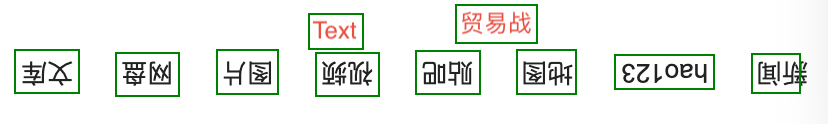

In [1]:
import time

import torch
from PIL import Image,ImageDraw
from myocr.config import MODEL_PATH
from myocr.modeling.model import ModelZoo
from myocr.predictors.text_direction_predictor import TextDirectionParamConverter
from myocr.predictors.text_detection_predictor import TextDetectionParamConverter
from myocr.predictors.text_recognition_predictor import TextRecognitionParamConverter

device = "cuda:0" if torch.cuda.is_available() else "cpu"

dec = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", device)
model = ModelZoo.load_model("onnx", MODEL_PATH+"cls.onnx", device)
rec_model = ModelZoo.load_model("onnx", MODEL_PATH+"rec.onnx", device)

orig_image = Image.open("../../tests/images/test_ocr2.png").convert("RGB")

start_time = time.time()
dec_predictor = dec.predictor(TextDetectionParamConverter(dec.device))
detected = dec_predictor.predict(orig_image)
if not detected:
    print("Nothing detected")
else:
    p = model.predictor(TextDirectionParamConverter())
    rec = p.predict(detected)
    p_rec = rec_model.predictor(TextRecognitionParamConverter())
    result = p_rec.predict(rec)
    end_time = time.time()
    # print(f"time: {end_time - start_time}")
    # print(result)
    
draw = ImageDraw.Draw(orig_image)
for box in detected.bounding_boxes: # type: ignore
    draw.polygon(
        [(box.left, box.bottom), (box.left, box.top), (box.right, box.top), (box.right, box.bottom)],
        outline="green",
        width=2,
    )

display(orig_image)